In [1]:
import pandas as pd
from scipy.io.arff import loadarff

# Reading the ARFF file
data = loadarff('data/pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

In [2]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], train_size=0.7, test_size=0.3, random_state=1, stratify=df['class'])

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score

# Creating a list of the number of features to be selected
n_features = [5, 10, 40, 100, 250, 700]

# Creating a list of the training and testing accuracies
train_acc = []
test_acc = []

def classifier(X, y):
        return mutual_info_classif(X, y, random_state=1)

# Loop to calculate the training and testing accuracies
for n in n_features:
        # Selecting the n most important features
        selector = SelectKBest(score_func=classifier, k=n)
        selector.fit(X_train, y_train)
        X_train_selected = selector.transform(X_train)
        X_test_selected = selector.transform(X_test)
        # Training a decision tree
        tree = DecisionTreeClassifier(random_state=1)
        tree.fit(X_train_selected, y_train)
        # Computing the training and testing accuracies
        train_acc.append(accuracy_score(y_train, tree.predict(X_train_selected)))
        test_acc.append(accuracy_score(y_test, tree.predict(X_test_selected)))


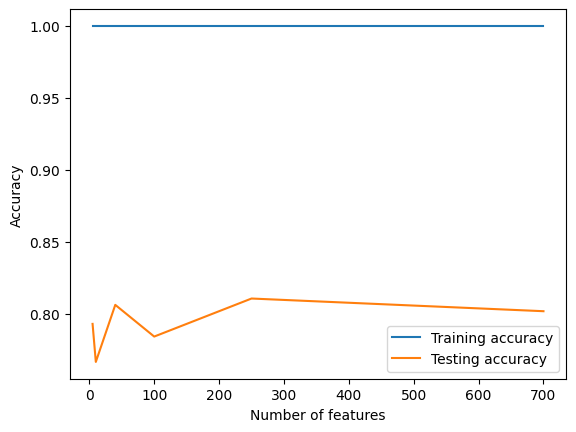

In [3]:
# Plotting the training and testing accuracies
import matplotlib.pyplot as plt
plt.plot(n_features, train_acc, label='Training accuracy')
plt.plot(n_features, test_acc, label='Testing accuracy')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()